### Diabetese Prediction in Females
- Objective: Predict diabetes diagnosis for  Female .

#### Data Understanding
 ###### Dataset Attributes:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2) DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)"

In [1]:
import pandas as pd
import numpy as np
df = pd .read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- From Above We can see that our data has no null values

#### Checking & Removing Outliers

In [6]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000


<AxesSubplot:>

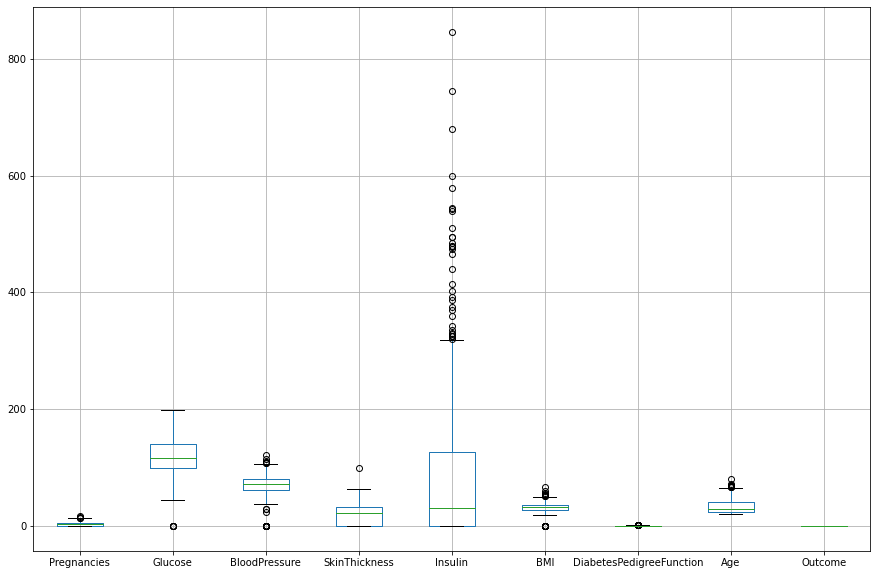

In [7]:
#Visualising Outliers
#Outlier Detection  with box plots
df.boxplot(figsize = (15,10))

- From Above BoxPlot we can say that Insulin column has highest no.of outliers in the data,followed by BloodPressure,Age,BMI.

In [8]:
# Outlier Handling 

In [9]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [10]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30445978, -2.48884101, -2.28758733, -2.10500141, -2.05369597,
       -2.02885837, -2.01096252, -2.00720763, -1.98655427, -1.95338702,
       -1.91601291, -1.88815728, -1.8134966 , -1.80857804, -1.74187579,
       -1.73154315, -1.71639102, -1.71372358, -1.67587303, -1.64102097,
       -1.63498158, -1.62215678, -1.61146741, -1.59344933, -1.54582494,
       -1.54285259, -1.51413703, -1.49974262, -1.49619189, -1.48877158])

In [11]:
#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

-2.007207629622323

In [12]:
#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

In [13]:
# The size of the data set was examined.
df.shape

(760, 9)

In [14]:
correlation=df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129892,0.146147,-0.078836,-0.067616,0.013313,-0.036798,0.550368,0.221651
Glucose,0.129892,1.000000,0.154872,0.041838,0.311371,0.215590,0.119381,0.251472,0.470429
BloodPressure,0.146147,0.154872,1.000000,0.216006,0.094449,0.289454,0.043470,0.246845,0.069482
SkinThickness,-0.078836,0.041838,0.216006,1.000000,0.467591,0.399926,0.179742,-0.132269,0.068955
Insulin,-0.067616,0.311371,0.094449,0.467591,1.000000,0.189492,0.159211,-0.059600,0.138433
BMI,0.013313,0.215590,0.289454,0.399926,0.189492,1.000000,0.141136,0.032263,0.295992
DiabetesPedigreeFunction,-0.036798,0.119381,0.043470,0.179742,0.159211,0.141136,1.000000,0.033805,0.182062
Age,0.550368,0.251472,0.246845,-0.132269,-0.059600,0.032263,0.033805,1.000000,0.229015
Outcome,0.221651,0.470429,0.069482,0.068955,0.138433,0.295992,0.182062,0.229015,1.000000


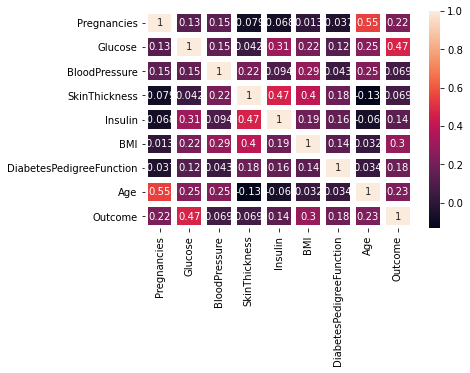

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
#checking co relation with heatmap
uniform_data = np.random.rand(7, 7)
ax = sns.heatmap(df.corr(),annot=True,linewidth =5)

- Outcome is Highly dependent on Glucose Level Of Patient and also on BMI
- Insulin level is directly proportional to SkinThickness 

In [16]:
a= df.drop(['Pregnancies'],axis=1)
a

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [17]:
b = df['Outcome'].value_counts()
b

0    494
1    266
Name: Outcome, dtype: int64

- We can see From above we have found out there are 500 non diabetic patients and 268 nos. of diabetic patients

In [19]:
x = a.iloc[:,:7]
y = a.iloc[:,7]
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#### Model Training & Testing

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25) # test data is 25%

In [22]:
x_train.shape

(570, 7)

In [23]:
y_train.shape

(570,)

In [24]:
y_train.value_counts()

0    369
1    201
Name: Outcome, dtype: int64

In [25]:
y_test.value_counts()

0    125
1     65
Name: Outcome, dtype: int64

In [26]:
#Finding Out Missing Value is the Dataset
print("total number of rows : {0}".format(len(df)))
print("number of rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))

total number of rows : 760
number of rows missing Glucose: 3
number of rows missing BloodPressure: 35
number of rows missing Insulin: 369
number of rows missing BMI: 10
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 226


- From Above we can observe that these values can't be ommited so we have to impute these values 

In [27]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\dell\anaconda\lib\site-packages (1.1.2)


In [29]:
from sklearn.impute import SimpleImputer

fill_values=SimpleImputer(missing_values=0,strategy='mean')

fill_values.fit(x_train)
imp_x_train=fill_values.transform(x_train)

fill_values.fit(x_test)
imp_x_test=fill_values.transform(x_test)

In [30]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
y_pred_df1 = pd.DataFrame(y_pred,columns=['Predicted_value'])
y_pred_df1.head()

,Predicted_value
0,0
1,0
2,1
3,1
4,0


In [33]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,Outcome
729,0
463,0
740,1
386,1
511,0
...,...
98,0
178,0
562,0
83,0


In [34]:
y_test_df = y_test_df.reset_index(drop=True)#as index were not proper we reset the index values
y_test_df.head()

,Outcome
0,0
1,0
2,1
3,1
4,0


In [35]:
result_df = pd.concat([y_test_df,y_pred_df1],axis=1)
result_df

,Outcome,Predicted_value
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
185,0,0
186,0,1
187,0,0
188,0,0


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[101,  24],
       [ 22,  43]], dtype=int64)

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

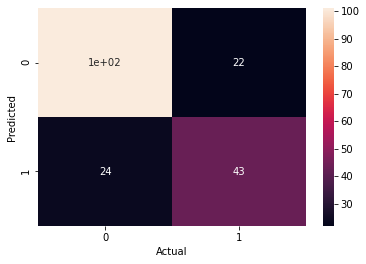

In [37]:
data = {'y_Actual':y_test,'y_Predicted':y_pred}
df = pd.DataFrame(data,columns=['y_Actual','y_Predicted'])
clf_confusion_matrix=pd.crosstab(df['y_Predicted'],df['y_Actual'],rownames=['Predicted'],colnames=['Actual'])
sns.heatmap(clf_confusion_matrix,annot=True)

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf2 =RandomForestClassifier(n_estimators=10)
clf2.fit(x_train,y_train)
y_pred_rf = clf2.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred_rf)

array([[108,  17],
       [ 28,  37]], dtype=int64)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[101  24]
 [ 22  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       125
           1       0.64      0.66      0.65        65

    accuracy                           0.76       190
   macro avg       0.73      0.73      0.73       190
weighted avg       0.76      0.76      0.76       190

Accuracy: 0.7578947368421053


<AxesSubplot:xlabel='y_Actual', ylabel='Predicted'>

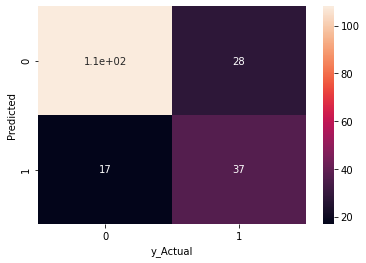

In [41]:
import seaborn as sn
data ={'y_Actual':y_test,'y_Predicted':y_pred_rf}
df =pd.DataFrame(data,columns =['y_Actual','y_Predicted'])
clf_confusion_matrix = pd.crosstab(df['y_Predicted'],df['y_Actual'], rownames=['Predicted'])
sns.heatmap(clf_confusion_matrix, annot =True)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[101  24]
 [ 22  43]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       125
           1       0.64      0.66      0.65        65

    accuracy                           0.76       190
   macro avg       0.73      0.73      0.73       190
weighted avg       0.76      0.76      0.76       190

Accuracy: 0.7578947368421053


- From Above We can Say That our model have  75.78947% accuracy